In [1]:
import tensorflow_datasets as tfds

In [2]:
import numpy as np
import pandas as pd
from os import sep
from scipy import sparse;
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [3]:
rating_contents = pd.read_csv('./drive/MyDrive/details.csv', sep=',', encoding='latin-1')

In [4]:
rating_contents.head()

,content,rating
0,"Not the running time in any sense, but this se...",4
1,I wasn't really sure what I was getting myself...,2
2,I didn't know what to expect of this flick bec...,4
3,2019 Oak Cliff Film Festival\nGreetings again ...,4
4,Sam (Hayley Griffith) delivers pizza and compo...,3


In [5]:
rating_contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118326 entries, 0 to 118325
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  118326 non-null  object
 1   rating   118326 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [6]:
contents = rating_contents['content'].tolist()

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
def remove_stop_words(content):
  word_tokens = word_tokenize(content)
 
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
  filtered_sentence = []
  
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  return ' '.join(filtered_sentence)
  

In [11]:
s = """This is also sample sentence,
                  showing off the stop words filtration."""
remove_stop_words(s)

'This also sample sentence , showing stop words filtration .'

In [12]:
contents = [remove_stop_words(content) for content in contents]

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
train_contents = contents[:100000]
test_contents = contents[100000:]

In [15]:
val_contents = train_contents[90000:]
train_contents = train_contents[:90000]

In [16]:
labels = []

In [17]:
for rating in rating_contents['rating']:
  if (int(rating) <= 1):
    labels.append(0)
  elif (int(rating) > 1 and int(rating) <= 3):
    labels.append(1)
  else :
    labels.append(2)
 

In [18]:
ratings = rating_contents['rating'].tolist()

In [19]:
train_labels = labels[:100000]
test_labels = labels[100000:]


In [20]:
val_labels = train_labels[90000:]
train_labels = train_labels[:90000]

In [21]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

In [22]:
np.unique(train_labels)

array([0, 1, 2])

In [23]:
np.unique(test_labels)

array([0, 1, 2])

In [24]:
test_labels

array([1, 2, 1, ..., 1, 0, 1])

In [25]:
vocab_size = 10000
embedding_dim = 64
max_length = 200

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>")

In [28]:
tokenizer.fit_on_texts(train_contents)

In [29]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 "'s": 2,
 'i': 3,
 'the': 4,
 'film': 5,
 "''": 6,
 "n't": 7,
 'movie': 8,
 'one': 9,
 'it': 10,
 'like': 11,
 'good': 12,
 'story': 13,
 'also': 14,
 'well': 15,
 'really': 16,
 'time': 17,
 'this': 18,
 'much': 19,
 'even': 20,
 'would': 21,
 "'": 22,
 'first': 23,
 'get': 24,
 'great': 25,
 'see': 26,
 'way': 27,
 'characters': 28,
 'character': 29,
 'two': 30,
 'best': 31,
 'and': 32,
 'but': 33,
 'make': 34,
 'could': 35,
 'people': 36,
 'he': 37,
 'a': 38,
 'there': 39,
 'little': 40,
 'in': 41,
 'still': 42,
 'many': 43,
 'action': 44,
 'made': 45,
 'man': 46,
 'films': 47,
 'new': 48,
 'life': 49,
 'show': 50,
 'back': 51,
 'bad': 52,
 'better': 53,
 'movies': 54,
 'watch': 55,
 'cast': 56,
 'never': 57,
 'love': 58,
 'think': 59,
 'series': 60,
 'go': 61,
 'end': 62,
 'lot': 63,
 'know': 64,
 'plot': 65,
 'though': 66,
 'quite': 67,
 'something': 68,
 'things': 69,
 'scenes': 70,
 'director': 71,
 'going': 72,
 'another': 73,
 'years': 74,
 'bit': 75,
 'scene': 7

In [30]:
train_sequences = tokenizer.texts_to_sequences(train_contents)

In [31]:
train_sequences

[[188,
  483,
  17,
  210,
  120,
  11,
  35,
  19,
  793,
  35,
  35,
  20,
  77,
  20,
  63,
  12,
  5279,
  490,
  2764,
  1,
  115,
  16,
  1,
  103,
  174,
  515,
  101,
  64,
  384,
  14,
  1,
  33,
  7,
  268,
  1,
  7284,
  218,
  106,
  27,
  61,
  1075,
  63,
  69,
  1173,
  202,
  29,
  69,
  122,
  2655,
  6026,
  6759,
  148,
  220,
  55,
  82],
 [3,
  7,
  16,
  150,
  3,
  240,
  3,
  3191,
  55,
  2692,
  8,
  6797,
  4646,
  6,
  71,
  1,
  1,
  3,
  341,
  704,
  80,
  86,
  32,
  150,
  8,
  1,
  80,
  86,
  2074,
  1708,
  7000,
  3,
  7,
  161,
  75,
  7172,
  493,
  415,
  176,
  174,
  377,
  8,
  9333,
  4717,
  2147,
  622,
  1,
  10,
  6273,
  2147,
  3211,
  205,
  8,
  528,
  6797,
  4646,
  6,
  1157,
  118,
  48,
  80,
  306,
  528,
  226,
  1927,
  829,
  341,
  8,
  4,
  822,
  3191,
  6955,
  9612,
  69,
  622,
  7,
  7952,
  538,
  55,
  174,
  4,
  100,
  8,
  2239,
  142,
  1730,
  35,
  118,
  1654,
  1,
  923,
  4987,
  593,
  1,
  1,
  1343,
  10,

In [32]:
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, truncating='post', padding='post')

In [33]:
padded_train_sequences

array([[ 188,  483,   17, ...,    0,    0,    0],
       [   3,    7,   16, ...,    0,    0,    0],
       [   3,    7,   64, ...,    0,    0,    0],
       ...,
       [4017, 5931, 5420, ...,    0,    0,    0],
       [  18,    5,  734, ...,    0,    0,    0],
       [   3,   67,  288, ..., 1046,    0,    0]], dtype=int32)

In [34]:
test_sequences = tokenizer.texts_to_sequences(test_contents)
val_sequences = tokenizer.texts_to_sequences(val_contents)

In [35]:
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, truncating='post', padding='post')
padded_val_sequences = pad_sequences(val_sequences, maxlen=max_length, truncating='post', padding='post')

In [36]:
padded_test_sequences

array([[4723,  414, 3708, ...,    0,    0,    0],
       [  16,   12,   55, ...,    0,    0,    0],
       [4723,  414,  157, ...,    0,    0,    0],
       ...,
       [  73,   13,    1, ...,    0,    0,    0],
       [ 116, 4939,  376, ...,    0,    0,    0],
       [7587, 6318, 4827, ...,    0,    0,    0]], dtype=int32)

In [37]:
padded_test_sequences.shape

(18326, 200)

In [38]:
from tensorflow.keras.models import Sequential

In [39]:
from tensorflow.keras.layers import Embedding

In [40]:
from tensorflow.keras.layers import Flatten

In [41]:
from tensorflow.keras.layers import Dense

In [42]:
from tensorflow.keras.layers import Dropout

In [43]:
model = Sequential()

In [44]:
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

In [45]:
model.add(Dropout(0.6))

In [46]:
model.add(Flatten())

In [47]:
model.add(Dropout(0.5))

In [48]:
model.add(Dense(64, activation='relu'))

In [49]:
model.add(Dropout(0.3))

In [50]:
model.add(Dense(3, activation='softmax'))

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 dropout (Dropout)           (None, 200, 64)           0         
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dropout_1 (Dropout)         (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 64)                819264    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

In [53]:
padded_test_sequences.shape

(18326, 200)

In [54]:
test_labels

array([1, 2, 1, ..., 1, 0, 1])

In [55]:
padded_test_sequences

array([[4723,  414, 3708, ...,    0,    0,    0],
       [  16,   12,   55, ...,    0,    0,    0],
       [4723,  414,  157, ...,    0,    0,    0],
       ...,
       [  73,   13,    1, ...,    0,    0,    0],
       [ 116, 4939,  376, ...,    0,    0,    0],
       [7587, 6318, 4827, ...,    0,    0,    0]], dtype=int32)

In [61]:
from keras.utils import np_utils
train_l = np_utils.to_categorical(train_labels,3)
test_l = np_utils.to_categorical(test_labels, 3)
val_l = np_utils.to_categorical(val_labels, 3)

In [62]:
train_l

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [63]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [64]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", patience=5)

In [66]:
model.fit(padded_train_sequences, train_l, epochs=25, batch_size=128, validation_data=(padded_val_sequences, val_l), callbacks=[callback])


Epoch 1/25
  3/704 [..............................] - ETA: 21s - loss: 0.7933 - acc: 0.6146

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


704/704 [==============================] - 23s 33ms/step - loss: 0.6944 - acc: 0.6713 - val_loss: 0.6542 - val_acc: 0.6984
Epoch 2/25
704/704 [==============================] - 23s 33ms/step - loss: 0.5975 - acc: 0.7307 - val_loss: 0.6418 - val_acc: 0.7070
Epoch 3/25
704/704 [==============================] - 23s 33ms/step - loss: 0.5532 - acc: 0.7543 - val_loss: 0.6060 - val_acc: 0.7254
Epoch 4/25
704/704 [==============================] - 23s 33ms/step - loss: 0.5222 - acc: 0.7686 - val_loss: 0.6197 - val_acc: 0.7239
Epoch 5/25
704/704 [==============================] - 24s 33ms/step - loss: 0.4969 - acc: 0.7795 - val_loss: 0.6186 - val_acc: 0.7228
Epoch 6/25
704/704 [==============================] - 23s 33ms/step - loss: 0.4787 - acc: 0.7915 - val_loss: 0.6197 - val_acc: 0.7204
Epoch 7/25
704/704 [==============================] - 23s 33ms/step - loss: 0.4594 - acc: 0.8011 - val_loss: 0.6445 - val_acc: 0.7172
Epoch 8/25
704/704 [==============================] - 23s 33ms/step - los

In [67]:
con = "The last twenty minutes and the end are excellent but sadly to get to that point you have to endure pretty much endless boredom. The acting is ok but the characters are so unlikeable you barely care what happens to them by the time you get to the good bit. The kids are all awful people and the constant swearing is quite repulsive - it may have been a plot point but if it was it was far too heavy handed. It would have worked as a twenty minute episode of an anthology tv show but did not have enough substance to carry it for ninety minutes and the padding that was the building of the characters and their back stories just made it tiresome to watch. It's a shame - handled differently it could have been quite good."
test_cons = [con]

test_cons = [remove_stop_words(con) for con in test_cons]

In [68]:
test_seq = tokenizer.texts_to_sequences(test_cons)
padded_test_seq = pad_sequences(test_seq, maxlen=max_length, truncating='post', padding='post') 

In [69]:
result_one_hot_predicted = model.predict(padded_test_seq)
result_one_hot_predicted

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


array([[0.19467583, 0.7908833 , 0.01444087]], dtype=float32)

In [70]:
np.amax(result_one_hot_predicted)

0.7908833

In [71]:
rating_predicted = np.argmax(result_one_hot_predicted)

In [72]:
rating_predicted

1

In [73]:
test_predicted = model.predict(padded_test_sequences)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [74]:
test_predicted

array([[1.4192365e-01, 8.2787424e-01, 3.0202072e-02],
       [1.8108517e-04, 1.5443000e-01, 8.4538889e-01],
       [1.2621209e-04, 1.2758607e-01, 8.7228775e-01],
       ...,
       [1.4128615e-02, 8.4084773e-01, 1.4502367e-01],
       [1.8347426e-03, 3.4227869e-01, 6.5588653e-01],
       [3.6172383e-02, 5.3579670e-01, 4.2803091e-01]], dtype=float32)

In [75]:
predicted_labels = []

In [76]:

for result_one_hot_predicted in test_predicted:
  rating_predicted = np.argmax(result_one_hot_predicted)
  predicted_labels.append(rating_predicted)


In [77]:
predicted_labels

[1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,


In [78]:
test_labels

array([1, 2, 1, ..., 1, 0, 1])

In [79]:
X = np.arange(len(test_labels)).tolist()

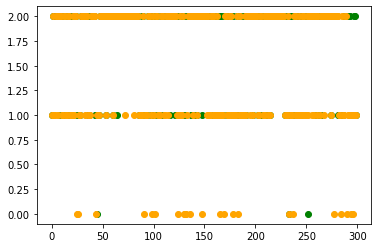

In [80]:
plt.scatter(X[:300], predicted_labels[:300], color='green')
plt.scatter(X[:300], test_labels[:300], color='orange')

In [81]:
score = model.evaluate(padded_test_sequences, test_l,verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [82]:
print(score)

[0.684077262878418, 0.7164683938026428]


In [83]:
embedding_layer = model.layers[0]

In [84]:
weights = embedding_layer.get_weights()[0]

In [85]:
weights

array([[ 3.3591678e-03, -1.9649686e-02, -1.5549950e-02, ...,
         1.0517011e-02, -4.3155123e-03, -5.5650063e-04],
       [ 6.4281384e-03, -1.4919276e-02, -3.3454811e-03, ...,
        -2.1750205e-03,  2.0345871e-03, -3.8409908e-03],
       [-9.3277143e-03, -2.6184920e-02,  7.4417423e-03, ...,
        -1.5365637e-02,  1.5671184e-02,  1.0943724e-02],
       ...,
       [-1.0401830e-01,  4.3558110e-02,  1.3429133e-02, ...,
        -8.3298147e-02,  4.0409610e-02, -1.1750037e-02],
       [-1.8048257e-02,  1.2708737e-01,  5.7880972e-02, ...,
        -7.6051012e-02, -1.0114724e-01, -5.2288018e-02],
       [-1.8852438e-01, -1.8318494e-04, -2.8055154e-03, ...,
        -6.6932820e-02, -8.7804623e-02, -3.1203683e-02]], dtype=float32)

In [86]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for idx in range(1, vocab_size):
  word = tokenizer.index_word[idx]
  vector = weights[idx]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(vi) for vi in vector]) + "\n")

out_m.close()
out_v.close()

In [87]:
model_json = model.to_json()

In [88]:
with open("./model.json", "w") as json_file:
  json_file.write(model_json)

In [89]:
model.save_weights("./model.h5")

In [90]:
json_file = open('./model.json', 'r')

In [91]:
loaded_model_json = json_file.read()

In [92]:
json_file.close()

In [93]:
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)

In [94]:
loaded_model.load_weights('./model.h5')

In [95]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [96]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 dropout (Dropout)           (None, 200, 64)           0         
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dropout_1 (Dropout)         (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 64)                819264    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

In [97]:
def suggest_movie_by_ratings(con):
  test_cons = [con]
  test_cons = [remove_stop_words(con) for con in test_cons]
  test_seq = tokenizer.texts_to_sequences(test_cons)
  padded_test_seq = pad_sequences(test_seq, maxlen=max_length, truncating='post', padding='post') 
  result_one_hot_predicted = model.predict(padded_test_seq)
  rating_predicted = np.argmax(result_one_hot_predicted)
  if (rating_predicted >= 2):
    return True
  return False


In [101]:
train_path = f'u1.base.csv'
test_path = f'u1.test.csv'
rating_train = pd.read_csv(train_path, sep=',', encoding='latin-1')[['user index', 'movie index', 'rating']].values
rating_test = pd.read_csv(test_path, sep=',', encoding='latin-1')[['user index', 'movie index', 'rating']].values


In [107]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse;

In [131]:
class collaborative_filering:
    def __init__(self, Y, k_neighbors, distance_func = cosine_similarity, mode = 1):
        self.mode = mode;
        if self.mode == 1:
            self.Y = Y
        else: 
            self.Y = Y[:, [1, 0, 2]]
        
        self.k_neighbors = k_neighbors
        self.distance_func = distance_func
        self.Y_utility = None
        # self.no_users = int(np.max(self.Y[:, 0])) + 1
        # self.no_movies = int(np.max(self.Y[:, 1])) + 1
        self.no_users = 1415
        self.no_movies = 9385

    def insert(self, data):
        self.Y = np.concatenate((self.Y, data), axis = 0)

    def normalize_data(self):
        users = self.Y[:, 0]
        self.Y_utility = self.Y.copy()
        self.mean_user = np.zeros((self.no_users, ))
        for i in range(self.no_users):
            user_id_list = np.where(users == i)[0].astype(np.int32)
            item_id_list = self.Y[user_id_list, 1]
            rating_list = self.Y[user_id_list, 2]
            if (len(rating_list) == 0):
                m = 0
            else :
                m = np.mean(rating_list)
                if np.isnan(m):
                    m = 0
            self.mean_user[i] = m
            self.Y_utility[user_id_list, 2] = rating_list - self.mean_user[i]
            
        self.Y_utility_sparse = sparse.coo_matrix((self.Y_utility[:, 2], (self.Y_utility[:, 1], self.Y_utility[:, 0])),  (self.no_movies, self.no_users))
        self.Y_utility_sparse = self.Y_utility_sparse.tocsr()
    

    def cal_similarity(self):
        self.similarity_matrix = self.distance_func(self.Y_utility_sparse.T, self.Y_utility_sparse.T)
       
    
    def refresh(self):
        self.normalize_data()
        self.cal_similarity()
    
    def fit(self):
        self.refresh()
    

    def predict_utils(self, user, i):
        user = int(user)
        i = int(i)
        user_id_list = np.where(self.Y[:, 1] == i)[0].astype(np.int32)
        user_id_list = (self.Y[user_id_list, 0]).astype(np.int32)
        similar = self.similarity_matrix[user, user_id_list]

        k_user_id_nearest = np.argsort(similar)[-self.k_neighbors: ]

        k_simlilar_nearest = similar[k_user_id_nearest]
        
        r = self.Y_utility_sparse[i, user_id_list[k_user_id_nearest]]
        
        
        return (r * k_simlilar_nearest)[0] / (np.abs(k_simlilar_nearest).sum() + 1e-8) + self.mean_user[user]

 

    def predict(self, user, i):
        
        if self.mode:
            return self.predict_utils(user, i)
        return self.predict_utils(i, user)
    

    def suggest(self, user):

        row_id_list = np.where(self.Y[:, 0] == user)[0]
        movie_list = self.Y[row_id_list, 1].tolist()

        res = []

        for i in range(self.no_movies):
            if i not in movie_list:
                rating = self.predict_utils(user, i)
                
                if rating > self.mean_user[user]:
                    res.append(i)
        
        return res
    
    def print(self):
        for i in range(self.no_users):
            res = self.suggest(i)
            if self.mode:
                print ('Recommend item(s):', res, 'to user', i)
            else: 
                print ('Recommend item', i, 'to user(s) : ', res)


In [132]:
CF_model = collaborative_filering(rating_train, k_neighbors=30, mode=1)
CF_model.fit()
print(CF_model.similarity_matrix.shape)
print(CF_model.similarity_matrix)

(1415, 1415)
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.02729247 0.03296902]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.11853795 0.14041219]
 [0.         0.02729247 0.         ... 0.11853795 1.         0.30930835]
 [0.         0.03296902 0.         ... 0.14041219 0.30930835 1.        ]]


In [133]:
CF_model.Y_utility_sparse.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [134]:
len(np.where(CF_model.Y_utility_sparse.toarray() > 0)[0])

13738

In [135]:
utility_sparse = CF_model.Y_utility_sparse.toarray()[~np.all(CF_model.Y_utility_sparse.toarray() == 0, axis=1)]

In [136]:
utility_sparse

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [141]:
similarity = CF_model.similarity_matrix

In [142]:
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.02729247,
        0.03296902],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.11853795,
        0.14041219],
       [0.        , 0.02729247, 0.        , ..., 0.11853795, 1.        ,
        0.30930835],
       [0.        , 0.03296902, 0.        , ..., 0.14041219, 0.30930835,
        1.        ]])

In [143]:
similarity.shape

(1415, 1415)

In [144]:
data = pd.read_csv(train_path, sep=',', encoding='latin-1')

In [145]:
data.head()

,movie index,movie id,user id,rating,content,date,user index
0,1336,tt3498622,ur53576145,2,Fortitude has a wonderful cast & the location ...,31 January 2015,996
1,1336,tt3498622,ur11701403,4,(This is a review of Season One. I'll update i...,1 May 2017,489
2,1336,tt3498622,ur79683341,4,"Of all 'Fortitude' 3 seasons, season 1 (an 8.6...",20 September 2020,1305
3,1336,tt3498622,ur0715971,2,OK. This is going to be an odd one. I've just ...,6 March 2019,1275
4,1336,tt3498622,ur32764997,4,"/refers to Season 1/At present, Brits and Scan...",11 October 2015,1269


In [146]:
cons = data['content'].tolist()

In [176]:
row_test = data.loc[4]

In [177]:
print(type(row_test))

<class 'pandas.core.series.Series'>


In [178]:
row_test

movie index                                                 1336
movie id                                               tt3498622
user id                                               ur32764997
rating                                                         4
content        /refers to Season 1/At present, Brits and Scan...
date                                             11 October 2015
user index                                                  1269
Name: 4, dtype: object

In [179]:
row_test[4]

'/refers to Season 1/At present, Brits and Scandinavians (Danes and Swedes in particular) are apparently the most versatile and distinct creator of thrilling crime series; even when clichÃ©s available, there are always new angles or approaches, plus competent choice of talented performers, many without global fame. All this also applies to Fortitude, where e.g. always great Stanley Tucci, Michael Gambon, Sofie GrÃ¥bÃ¸l do not stick out too much, so there is a nice team playing and level differences are conditioned by the "goodness" of a character, not by talent (in my opinion, GrÃ¥bÃ¸l\'s character was not too versatile and visible).As the plot, there were moments when I feared that events would take a too sci-fi turn, but, with the help of flashbacks, mysterious and criminal events found their satisfactory solution (well, a certain scene with flies was too much though). And the Nordic nature, wow... I have had some opportunities to experience it with my own eyes, but it is still magni

In [180]:
suggest_movie_by_ratings(row_test[4])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


True

In [181]:
movie_index = row_test[0]
user_index = row_test[-1]

In [192]:
movie_index

1336

In [191]:
user_index

1269

In [193]:
user_index = int(user_index)
movie_index = int(movie_index)
user_index_list = np.where(rating_train[:, 1] == movie_index)[0].astype(np.int32)
user_index_list = (rating_train[user_index_list, 0]).astype(np.int32)
similar = similarity[user_index, user_index_list]

k_user_index_nearest = np.argsort(similar)[-min(30, len(similar)):]


In [194]:
k_user_index_nearest

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12,  4])

In [196]:
data[data['user index'] == 3]

,movie index,movie id,user id,rating,content,date,user index
63362,5226,tt9012876,ur108950002,1,Made it through 1 1/2 episodes before I was ov...,7 February 2021,3
81817,6659,tt13784584,ur108950002,3,"I liked this. I'm not understanding the ""1"" re...",17 August 2021,3
85926,7107,tt12677870,ur108950002,1,"Yes, I rated the first ep, and yes my rating w...",3 April 2021,3
85927,7107,tt12677870,ur108950002,1,Trying to give ep2 a chance after really not l...,9 April 2021,3
87554,7325,tt12682076,ur108950002,4,This is how to properly reboot a classic. Tota...,23 September 2021,3
89527,7613,tt12887536,ur108950002,2,I'll reserve my rating for now. As far as the ...,7 October 2021,3
89528,7613,tt12887536,ur108950002,2,Unfortunately....this couldn't hold my attenti...,11 November 2021,3
92027,8112,tt10394844,ur108950002,1,The writing is elementary. There is barely any...,6 October 2020,3


In [197]:
details = pd.read_csv('./ml_details.csv', sep=',', encoding='latin-1')

In [198]:
cates = []

for movie_i in data[data['user index'] == 0]['movie index'].tolist():
  cates.append(details[details['movie index'] == movie_i]['genre list'])

In [199]:
cates

[4059    Crime|Thriller
 Name: genre list, dtype: object, 5083    Drama|Romance
 Name: genre list, dtype: object, 6229    Action|Adventure|Drama
 Name: genre list, dtype: object, 6633    Crime|Drama|Mystery
 Name: genre list, dtype: object, 6707    Drama|Fantasy|Romance
 Name: genre list, dtype: object, 8237    Comedy|Drama
 Name: genre list, dtype: object]